In [1]:
from classes import *
import SessionState
from sklearn.manifold import TSNE

# all plot with size = [20,16]
plt.rcParams['figure.figsize'] = [20, 16]

In [2]:

"""
Simulation parameters
"""
p_sim = {}
p_sim['n_samples'] = 1000
p_sim['n_features'] = 25
#p_sim['beta'] = [0.01 * (p_sim['n_features'] - i) / p_sim['n_features'] for i in range(0, p_sim['n_features'])]


idx = np.arange( p_sim['n_features'])
#beta = (-1) ** idx * np.exp(-idx/ 10.)
#beta_norm = np.linalg.norm(beta)
#p_beta = 1.
#p_sim['beta'] = (-1) ** idx * np.exp(-idx/ 10.)#p_beta * beta # / beta_norm
# select five 5 features
p_sim['beta'] = np.array([0.1, -0.1, 0.1, 0.1, 0.1]+[0.]*(p_sim['n_features']-5))


p_sim['alpha'] = 1
p_sim['lamb'] = 1
p_sim['coef_tt'] = .8
p_sim['rho'] =0.3 # 0.2
p_sim['kappa'] = 3.
p_sim['wd_param'] = 40. #4. # 40



p_sim['path_data'] = "./sim_surv"

"""
Model parameters
"""

p_survcaus = {}
p_survcaus['num_durations'] = 25
p_survcaus['encoded_features'] = 20
p_survcaus['alpha_wass'] = 1
p_survcaus['batch_size'] = 256
p_survcaus['epochs'] = 100
p_survcaus['lr'] = 1e-2
p_survcaus['patience'] = 10


In [3]:
# sin(πXi1Xi2) + 2(Xi3 − 0.5)2 + Xi4 + 0.5Xi5
f1 = lambda x : np.sin(np.pi*x[:,0]*x[:,1] + 2*(x[:,2]-0.5)**2 + x[:,3] + 0.5*x[:,4])

# 2 log(1 + exp(Xi1+Xi2+Xi3 )
f2 = lambda x : np.log(1 + np.exp(x[:,0] + x[:,1] + x[:,2]))

#  (max{Xi1 + Xi2 + Xi3, 0} + max{Xi4 + Xi5, 0}) /2
f3 = lambda x : (np.maximum(x[:,0] + x[:,1] + x[:,2], 0) + np.maximum(x[:,3] + x[:,4], 0)) / 2

#  max{Xi1 + Xi2, Xi3, 0} + max{Xi4 + Xi5, 0}
f4 = lambda x : (np.maximum(x[:,0] + x[:,1], 0) - np.maximum(x[:,3] + x[:,4], 0))


p_sim['scheme'] = Scheme('linear')
#Scheme('linear') #Scheme('nonlinear',f4) # Scheme('nonlinear', f4)


In [4]:
p_survcaus, p_sim 

({'num_durations': 25,
  'encoded_features': 20,
  'alpha_wass': 1,
  'batch_size': 256,
  'epochs': 100,
  'lr': 0.01,
  'patience': 10},
 {'n_samples': 1000,
  'n_features': 25,
  'beta': array([ 0.1, -0.1,  0.1,  0.1,  0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
          0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
          0. ,  0. ,  0. ]),
  'alpha': 1,
  'lamb': 1,
  'coef_tt': 0.8,
  'rho': 0.3,
  'kappa': 3.0,
  'wd_param': 40.0,
  'path_data': './sim_surv',
  'scheme': <classes.Scheme at 0x7fb8396c8c70>})

In [5]:
simu = SimulationNew(p_sim)
data = simu.simulation_surv()

WD =  64.83393859863281
tt = 1 : 48 % 
event = 1 : 74 %
Scheme :  linear
Wd_para :  40.0


In [6]:
data#.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X24,X25,tt,T_f_cens,event,T_1,T_0,T_f,T_cf,Xbeta
0,-0.794574,-0.830462,-0.852492,-0.870666,-0.847707,-0.940816,-0.891936,-0.826478,-0.828498,-0.825327,...,-0.906153,-0.848550,1,0.102437,1,0.102437,0.819962,0.102437,0.819962,-0.051707
1,-0.873059,-0.796726,-0.850050,-0.853438,-0.799770,-0.818312,-0.876355,-0.811451,-0.846630,-0.836098,...,-0.820257,-0.853115,1,0.612207,1,0.612207,0.641409,0.612207,0.641409,-0.158216
2,0.744495,0.805871,0.745894,0.776480,0.815679,0.803984,0.817392,0.864792,0.867686,0.921047,...,0.927304,0.835318,0,0.849787,1,0.999647,0.849787,0.849787,0.999647,-0.564927
3,-0.796397,-0.833860,-0.859248,-0.824019,-0.843862,-0.877905,-0.855039,-0.899283,-0.837664,-0.812012,...,-0.874012,-0.865478,1,0.357930,1,0.357930,1.349029,0.357930,1.349029,0.056458
4,0.900154,0.838371,0.785023,0.807069,0.782539,0.851276,0.871583,0.833195,0.779693,0.875101,...,0.814762,0.817129,0,2.462303,0,0.826216,5.803646,5.803646,0.826216,-0.183588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.804141,0.831228,0.849082,0.848630,0.878376,0.816918,0.745893,0.854043,0.817772,0.794549,...,0.830120,0.836382,0,0.439883,1,0.474556,0.439883,0.439883,0.474556,0.085188
996,0.777495,0.814830,0.792432,0.791441,0.774211,0.892131,0.838928,0.849234,0.839577,0.874174,...,0.844175,0.856912,0,0.081638,1,0.272573,0.081638,0.081638,0.272573,-0.459714
997,-0.818546,-0.858422,-0.886808,-0.898449,-0.847109,-0.838845,-0.792971,-0.825348,-0.841871,-0.864278,...,-0.776971,-0.808527,1,0.205822,1,0.205822,0.379203,0.205822,0.379203,-0.189009
998,0.842704,0.874218,0.960395,0.877434,0.865895,0.886142,0.787747,0.854436,0.861832,0.897772,...,0.778300,0.833898,0,0.188008,0,0.554934,1.443289,1.443289,0.554934,0.379323


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.077020
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.805153


2021-11-18 20:19:04.168 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-11-18 20:19:04.169 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


[t-SNE] KL divergence after 1000 iterations: 1.837891


<ipython-input-7-6badf8fd86fe>:15: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



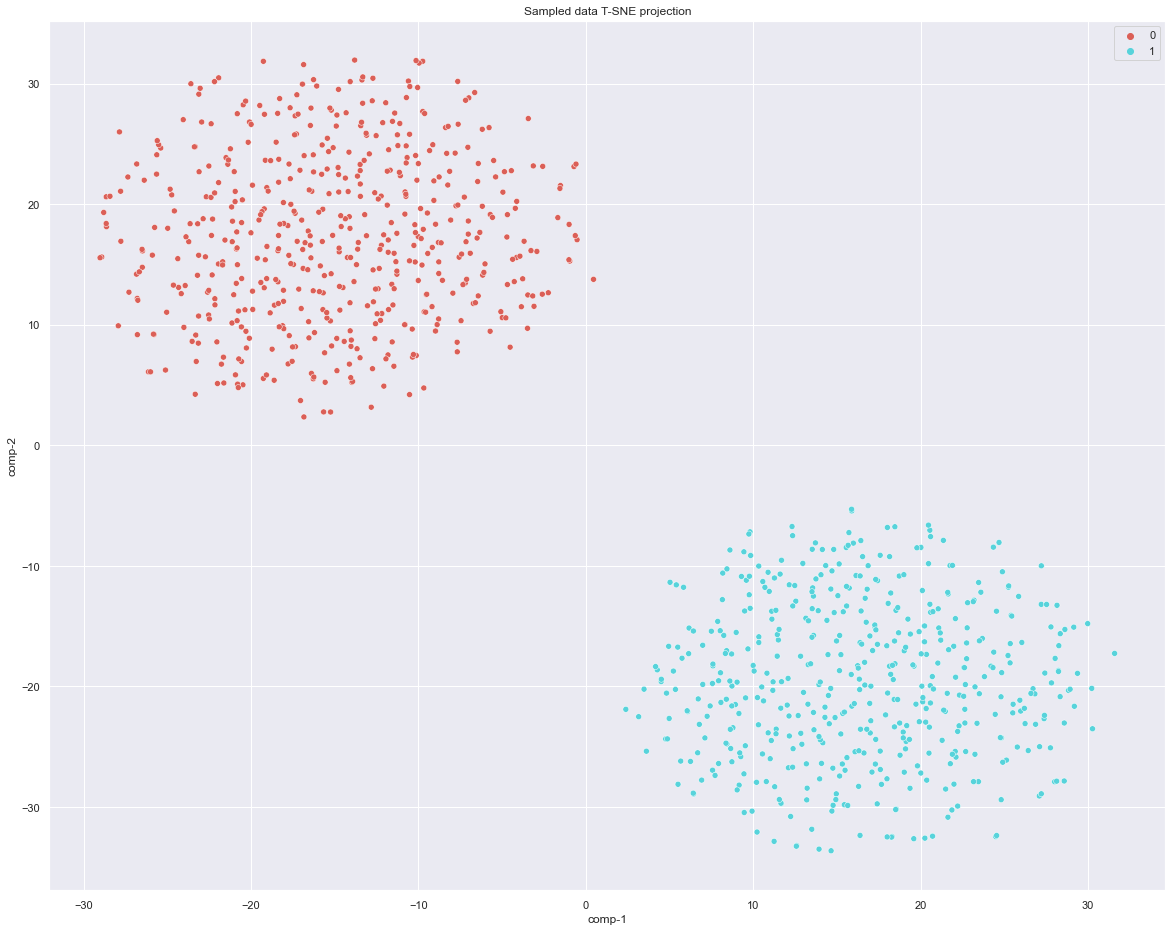

In [7]:
# TSNE

x = data.iloc[:, :p_sim['n_features']]
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(x)
d = pd.DataFrame()
d["tt"] = data[['tt']].values.squeeze()
d["comp-1"] = z[:, 0]
d["comp-2"] = z[:, 1]

fig = plt.figure()
sns.scatterplot(x="comp-1", y="comp-2", hue=d.tt.tolist(),
            palette=sns.color_palette("hls", 2),
            data=d).set(title="Sampled data T-SNE projection")
fig.show()


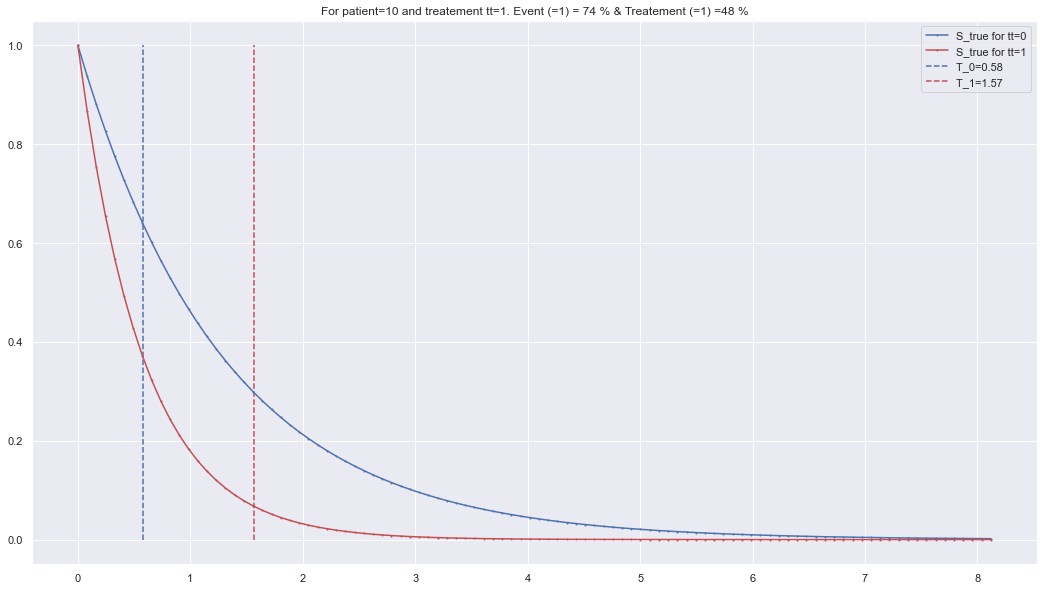

In [8]:
simu.plot_surv_true(patient=10)

# Tunning

In [9]:
#Tunning Survcaus 


tunning = Tunning(p_sim)
n_trials = 10
   
    
p_survcaus_best = tunning.get_best_hyperparameter_survcaus(n_trials=10)


[I 2021-11-18 20:19:04,739] A new study created in memory with name: no-name-8f54ea99-c4fd-49f1-8488-a15a19c9145c


0:	[0s / 0s],		train_loss: 3.1041,	train_loss_surv: 3.1021,	train_loss_wass: 0.0011,	val_loss: 3.1804,	val_loss_surv: 3.1793,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 3.0777,	train_loss_surv: 3.0763,	train_loss_wass: 0.0008,	val_loss: 3.1798,	val_loss_surv: 3.1789,	val_loss_wass: 0.0006
2:	[0s / 0s],		train_loss: 3.0468,	train_loss_surv: 3.0453,	train_loss_wass: 0.0009,	val_loss: 3.1791,	val_loss_surv: 3.1781,	val_loss_wass: 0.0005
3:	[0s / 0s],		train_loss: 3.1202,	train_loss_surv: 3.1171,	train_loss_wass: 0.0018,	val_loss: 3.1785,	val_loss_surv: 3.1776,	val_loss_wass: 0.0005
4:	[0s / 0s],		train_loss: 3.0672,	train_loss_surv: 3.0663,	train_loss_wass: 0.0005,	val_loss: 3.1784,	val_loss_surv: 3.1775,	val_loss_wass: 0.0005
5:	[0s / 0s],		train_loss: 3.0699,	train_loss_surv: 3.0668,	train_loss_wass: 0.0018,	val_loss: 3.1783,	val_loss_surv: 3.1774,	val_loss_wass: 0.0005
6:	[0s / 0s],		train_loss: 3.1055,	train_loss_surv: 3.1045,	train_loss_wass: 0.0006,	val_loss: 3.1779,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

16:	[0s / 0s],		train_loss: 3.0403,	train_loss_surv: 3.0394,	train_loss_wass: 0.0006,	val_loss: 3.1504,	val_loss_surv: 3.1496,	val_loss_wass: 0.0005
17:	[0s / 1s],		train_loss: 3.0392,	train_loss_surv: 3.0384,	train_loss_wass: 0.0005,	val_loss: 3.1464,	val_loss_surv: 3.1456,	val_loss_wass: 0.0005
18:	[0s / 1s],		train_loss: 3.0121,	train_loss_surv: 3.0115,	train_loss_wass: 0.0004,	val_loss: 3.1420,	val_loss_surv: 3.1412,	val_loss_wass: 0.0005
19:	[0s / 1s],		train_loss: 3.0480,	train_loss_surv: 3.0466,	train_loss_wass: 0.0008,	val_loss: 3.1382,	val_loss_surv: 3.1374,	val_loss_wass: 0.0005


100%|██████████| 200/200 [00:00<00:00, 1201.72it/s]
[I 2021-11-18 20:19:06,385] Trial 0 finished with value: 0.023100006825224804 and parameters: {'num_durations': 48, 'encoded_features': 65, 'alpha_wass': 1.717119156869511, 'lr': 0.0008007983202929871}. Best is trial 0 with value: 0.023100006825224804.


0:	[0s / 0s],		train_loss: 2.6837,	train_loss_surv: 2.6830,	train_loss_wass: 0.0003,	val_loss: 2.6965,	val_loss_surv: 2.6955,	val_loss_wass: 0.0004
1:	[0s / 0s],		train_loss: 2.6119,	train_loss_surv: 2.6102,	train_loss_wass: 0.0006,	val_loss: 2.6847,	val_loss_surv: 2.6835,	val_loss_wass: 0.0004
2:	[0s / 0s],		train_loss: 2.5550,	train_loss_surv: 2.5537,	train_loss_wass: 0.0005,	val_loss: 2.6674,	val_loss_surv: 2.6664,	val_loss_wass: 0.0004
3:	[0s / 0s],		train_loss: 2.6056,	train_loss_surv: 2.6043,	train_loss_wass: 0.0005,	val_loss: 2.6540,	val_loss_surv: 2.6530,	val_loss_wass: 0.0004
4:	[0s / 0s],		train_loss: 2.6068,	train_loss_surv: 2.6056,	train_loss_wass: 0.0004,	val_loss: 2.6410,	val_loss_surv: 2.6402,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 2.5509,	train_loss_surv: 2.5503,	train_loss_wass: 0.0002,	val_loss: 2.6302,	val_loss_surv: 2.6295,	val_loss_wass: 0.0003
6:	[0s / 0s],		train_loss: 2.5229,	train_loss_surv: 2.5224,	train_loss_wass: 0.0002,	val_loss: 2.6144,	val_loss_

100%|██████████| 200/200 [00:00<00:00, 1304.72it/s]
[I 2021-11-18 20:19:07,383] Trial 1 finished with value: 0.02244222390477843 and parameters: {'num_durations': 26, 'encoded_features': 11, 'alpha_wass': 2.6255577450185843, 'lr': 0.005730649268255222}. Best is trial 1 with value: 0.02244222390477843.


16:	[0s / 0s],		train_loss: 2.5841,	train_loss_surv: 2.5839,	train_loss_wass: 0.0001,	val_loss: 2.5764,	val_loss_surv: 2.5762,	val_loss_wass: 0.0001
17:	[0s / 0s],		train_loss: 2.5645,	train_loss_surv: 2.5639,	train_loss_wass: 0.0003,	val_loss: 2.5794,	val_loss_surv: 2.5788,	val_loss_wass: 0.0002
0:	[0s / 0s],		train_loss: 3.3467,	train_loss_surv: 3.3463,	train_loss_wass: 0.0020,	val_loss: 3.5099,	val_loss_surv: 3.5096,	val_loss_wass: 0.0018
1:	[0s / 0s],		train_loss: 3.3191,	train_loss_surv: 3.3187,	train_loss_wass: 0.0024,	val_loss: 3.5055,	val_loss_surv: 3.5051,	val_loss_wass: 0.0026
2:	[0s / 0s],		train_loss: 3.2335,	train_loss_surv: 3.2327,	train_loss_wass: 0.0046,	val_loss: 3.4993,	val_loss_surv: 3.4986,	val_loss_wass: 0.0040
3:	[0s / 0s],		train_loss: 3.2357,	train_loss_surv: 3.2346,	train_loss_wass: 0.0065,	val_loss: 3.5026,	val_loss_surv: 3.5016,	val_loss_wass: 0.0059


  0%|          | 0/200 [00:00<?, ?it/s]

4:	[0s / 0s],		train_loss: 3.2958,	train_loss_surv: 3.2942,	train_loss_wass: 0.0096,	val_loss: 3.5230,	val_loss_surv: 3.5219,	val_loss_wass: 0.0067
5:	[0s / 0s],		train_loss: 3.2288,	train_loss_surv: 3.2270,	train_loss_wass: 0.0109,	val_loss: 3.5306,	val_loss_surv: 3.5291,	val_loss_wass: 0.0088
6:	[0s / 0s],		train_loss: 3.2181,	train_loss_surv: 3.2168,	train_loss_wass: 0.0076,	val_loss: 3.5233,	val_loss_surv: 3.5226,	val_loss_wass: 0.0044


100%|██████████| 200/200 [00:00<00:00, 1137.08it/s]
[I 2021-11-18 20:19:08,138] Trial 2 finished with value: 0.02789607653457781 and parameters: {'num_durations': 64, 'encoded_features': 63, 'alpha_wass': 0.16287019867801567, 'lr': 0.00838270924071938}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.3350,	train_loss_surv: 3.3249,	train_loss_wass: 0.0014,	val_loss: 3.3467,	val_loss_surv: 3.3350,	val_loss_wass: 0.0016
1:	[0s / 0s],		train_loss: 3.2961,	train_loss_surv: 3.2876,	train_loss_wass: 0.0011,	val_loss: 3.3452,	val_loss_surv: 3.3336,	val_loss_wass: 0.0015
2:	[0s / 0s],		train_loss: 3.3749,	train_loss_surv: 3.3592,	train_loss_wass: 0.0021,	val_loss: 3.3438,	val_loss_surv: 3.3325,	val_loss_wass: 0.0015
3:	[0s / 0s],		train_loss: 3.2757,	train_loss_surv: 3.2652,	train_loss_wass: 0.0014,	val_loss: 3.3431,	val_loss_surv: 3.3320,	val_loss_wass: 0.0015
4:	[0s / 0s],		train_loss: 3.3675,	train_loss_surv: 3.3558,	train_loss_wass: 0.0016,	val_loss: 3.3432,	val_loss_surv: 3.3322,	val_loss_wass: 0.0015
5:	[0s / 0s],		train_loss: 3.3373,	train_loss_surv: 3.3290,	train_loss_wass: 0.0011,	val_loss: 3.3437,	val_loss_surv: 3.3329,	val_loss_wass: 0.0015


 52%|█████▎    | 105/200 [00:00<00:00, 1044.66it/s]

6:	[0s / 0s],		train_loss: 3.3144,	train_loss_surv: 3.3024,	train_loss_wass: 0.0016,	val_loss: 3.3445,	val_loss_surv: 3.3338,	val_loss_wass: 0.0014
7:	[0s / 0s],		train_loss: 3.3265,	train_loss_surv: 3.3192,	train_loss_wass: 0.0010,	val_loss: 3.3456,	val_loss_surv: 3.3350,	val_loss_wass: 0.0014


100%|██████████| 200/200 [00:00<00:00, 1046.84it/s]
[I 2021-11-18 20:19:09,006] Trial 3 finished with value: 0.02918876677618026 and parameters: {'num_durations': 64, 'encoded_features': 69, 'alpha_wass': 7.454561402371972, 'lr': 0.00012081452372810326}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.0515,	train_loss_surv: 3.0446,	train_loss_wass: 0.0018,	val_loss: 3.0478,	val_loss_surv: 3.0386,	val_loss_wass: 0.0024
1:	[0s / 0s],		train_loss: 2.9854,	train_loss_surv: 2.9759,	train_loss_wass: 0.0024,	val_loss: 3.0416,	val_loss_surv: 3.0341,	val_loss_wass: 0.0019
2:	[0s / 0s],		train_loss: 2.9734,	train_loss_surv: 2.9603,	train_loss_wass: 0.0033,	val_loss: 3.0430,	val_loss_surv: 3.0313,	val_loss_wass: 0.0030
3:	[0s / 0s],		train_loss: 2.9380,	train_loss_surv: 2.9257,	train_loss_wass: 0.0031,	val_loss: 3.0372,	val_loss_surv: 3.0294,	val_loss_wass: 0.0020
4:	[0s / 0s],		train_loss: 3.0004,	train_loss_surv: 2.9928,	train_loss_wass: 0.0019,	val_loss: 3.0287,	val_loss_surv: 3.0222,	val_loss_wass: 0.0017
5:	[0s / 0s],		train_loss: 2.9242,	train_loss_surv: 2.9199,	train_loss_wass: 0.0011,	val_loss: 3.0246,	val_loss_surv: 3.0201,	val_loss_wass: 0.0011


  0%|          | 0/200 [00:00<?, ?it/s]

6:	[0s / 0s],		train_loss: 2.9415,	train_loss_surv: 2.9328,	train_loss_wass: 0.0022,	val_loss: 3.0337,	val_loss_surv: 3.0289,	val_loss_wass: 0.0012
7:	[0s / 0s],		train_loss: 2.9278,	train_loss_surv: 2.9245,	train_loss_wass: 0.0008,	val_loss: 3.0265,	val_loss_surv: 3.0230,	val_loss_wass: 0.0009
8:	[0s / 0s],		train_loss: 3.0165,	train_loss_surv: 3.0149,	train_loss_wass: 0.0004,	val_loss: 3.0394,	val_loss_surv: 3.0365,	val_loss_wass: 0.0008
9:	[0s / 0s],		train_loss: 2.8855,	train_loss_surv: 2.8833,	train_loss_wass: 0.0006,	val_loss: 3.0404,	val_loss_surv: 3.0377,	val_loss_wass: 0.0007


100%|██████████| 200/200 [00:00<00:00, 1118.74it/s]
[I 2021-11-18 20:19:09,991] Trial 4 finished with value: 0.02687281753472081 and parameters: {'num_durations': 43, 'encoded_features': 57, 'alpha_wass': 3.9131532932063253, 'lr': 0.008450929085121645}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.4875,	train_loss_surv: 3.4866,	train_loss_wass: 0.0001,	val_loss: 3.5831,	val_loss_surv: 3.5821,	val_loss_wass: 0.0001
1:	[0s / 0s],		train_loss: 3.4166,	train_loss_surv: 3.4159,	train_loss_wass: 0.0001,	val_loss: 3.5829,	val_loss_surv: 3.5819,	val_loss_wass: 0.0001
2:	[0s / 0s],		train_loss: 3.4193,	train_loss_surv: 3.4185,	train_loss_wass: 0.0001,	val_loss: 3.5828,	val_loss_surv: 3.5818,	val_loss_wass: 0.0001
3:	[0s / 0s],		train_loss: 3.5118,	train_loss_surv: 3.5105,	train_loss_wass: 0.0001,	val_loss: 3.5827,	val_loss_surv: 3.5817,	val_loss_wass: 0.0001
4:	[0s / 0s],		train_loss: 3.4893,	train_loss_surv: 3.4880,	train_loss_wass: 0.0002,	val_loss: 3.5825,	val_loss_surv: 3.5815,	val_loss_wass: 0.0001
5:	[0s / 0s],		train_loss: 3.4550,	train_loss_surv: 3.4536,	train_loss_wass: 0.0002,	val_loss: 3.5822,	val_loss_surv: 3.5812,	val_loss_wass: 0.0001
6:	[0s / 0s],		train_loss: 3.4933,	train_loss_surv: 3.4924,	train_loss_wass: 0.0001,	val_loss: 3.5820,	val_loss_

  0%|          | 0/200 [00:00<?, ?it/s]

16:	[0s / 0s],		train_loss: 3.4295,	train_loss_surv: 3.4290,	train_loss_wass: 0.0001,	val_loss: 3.5639,	val_loss_surv: 3.5631,	val_loss_wass: 0.0001
17:	[0s / 0s],		train_loss: 3.4498,	train_loss_surv: 3.4494,	train_loss_wass: 0.0000,	val_loss: 3.5602,	val_loss_surv: 3.5595,	val_loss_wass: 0.0001
18:	[0s / 0s],		train_loss: 3.4614,	train_loss_surv: 3.4608,	train_loss_wass: 0.0001,	val_loss: 3.5552,	val_loss_surv: 3.5545,	val_loss_wass: 0.0001
19:	[0s / 1s],		train_loss: 3.4509,	train_loss_surv: 3.4504,	train_loss_wass: 0.0001,	val_loss: 3.5513,	val_loss_surv: 3.5506,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 847.04it/s] 
[I 2021-11-18 20:19:11,392] Trial 5 finished with value: 0.023135175560801975 and parameters: {'num_durations': 80, 'encoded_features': 10, 'alpha_wass': 8.712399357863926, 'lr': 0.0003299340385226353}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.1607,	train_loss_surv: 3.1468,	train_loss_wass: 0.0018,	val_loss: 3.2840,	val_loss_surv: 3.2774,	val_loss_wass: 0.0009
1:	[0s / 0s],		train_loss: 3.1730,	train_loss_surv: 3.1571,	train_loss_wass: 0.0021,	val_loss: 3.2846,	val_loss_surv: 3.2782,	val_loss_wass: 0.0008
2:	[0s / 0s],		train_loss: 3.0732,	train_loss_surv: 3.0647,	train_loss_wass: 0.0011,	val_loss: 3.2856,	val_loss_surv: 3.2795,	val_loss_wass: 0.0008
3:	[0s / 0s],		train_loss: 3.1638,	train_loss_surv: 3.1531,	train_loss_wass: 0.0014,	val_loss: 3.2872,	val_loss_surv: 3.2813,	val_loss_wass: 0.0008


 34%|███▎      | 67/200 [00:00<00:00, 662.50it/s]

4:	[0s / 0s],		train_loss: 3.1202,	train_loss_surv: 3.1137,	train_loss_wass: 0.0008,	val_loss: 3.2892,	val_loss_surv: 3.2835,	val_loss_wass: 0.0007


100%|██████████| 200/200 [00:00<00:00, 678.84it/s]
[I 2021-11-18 20:19:12,549] Trial 6 finished with value: 0.029603667651648874 and parameters: {'num_durations': 49, 'encoded_features': 70, 'alpha_wass': 7.7201054225754175, 'lr': 0.0001436679150655653}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.5507,	train_loss_surv: 3.5497,	train_loss_wass: 0.0004,	val_loss: 3.6945,	val_loss_surv: 3.6929,	val_loss_wass: 0.0006
1:	[0s / 0s],		train_loss: 3.5575,	train_loss_surv: 3.5562,	train_loss_wass: 0.0004,	val_loss: 3.6944,	val_loss_surv: 3.6925,	val_loss_wass: 0.0007
2:	[0s / 0s],		train_loss: 3.5021,	train_loss_surv: 3.5006,	train_loss_wass: 0.0005,	val_loss: 3.6948,	val_loss_surv: 3.6928,	val_loss_wass: 0.0007


  0%|          | 0/200 [00:00<?, ?it/s]

3:	[0s / 0s],		train_loss: 3.5065,	train_loss_surv: 3.5041,	train_loss_wass: 0.0009,	val_loss: 3.6952,	val_loss_surv: 3.6932,	val_loss_wass: 0.0007
4:	[0s / 0s],		train_loss: 3.5043,	train_loss_surv: 3.5017,	train_loss_wass: 0.0009,	val_loss: 3.6964,	val_loss_surv: 3.6942,	val_loss_wass: 0.0007
5:	[0s / 0s],		train_loss: 3.5099,	train_loss_surv: 3.5076,	train_loss_wass: 0.0008,	val_loss: 3.6975,	val_loss_surv: 3.6954,	val_loss_wass: 0.0007


100%|██████████| 200/200 [00:00<00:00, 718.53it/s]
[I 2021-11-18 20:19:13,521] Trial 7 finished with value: 0.028535040139673527 and parameters: {'num_durations': 85, 'encoded_features': 31, 'alpha_wass': 2.873444365285729, 'lr': 0.0009656212942727474}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.1613,	train_loss_surv: 3.1599,	train_loss_wass: 0.0015,	val_loss: 3.3308,	val_loss_surv: 3.3300,	val_loss_wass: 0.0008
1:	[0s / 0s],		train_loss: 3.1416,	train_loss_surv: 3.1402,	train_loss_wass: 0.0014,	val_loss: 3.3315,	val_loss_surv: 3.3307,	val_loss_wass: 0.0009
2:	[0s / 0s],		train_loss: 3.1196,	train_loss_surv: 3.1183,	train_loss_wass: 0.0013,	val_loss: 3.3319,	val_loss_surv: 3.3310,	val_loss_wass: 0.0009


  0%|          | 0/200 [00:00<?, ?it/s]

3:	[0s / 0s],		train_loss: 3.0977,	train_loss_surv: 3.0963,	train_loss_wass: 0.0015,	val_loss: 3.3322,	val_loss_surv: 3.3314,	val_loss_wass: 0.0009
4:	[0s / 0s],		train_loss: 3.0775,	train_loss_surv: 3.0760,	train_loss_wass: 0.0015,	val_loss: 3.3326,	val_loss_surv: 3.3318,	val_loss_wass: 0.0009


100%|██████████| 200/200 [00:00<00:00, 611.08it/s]
[I 2021-11-18 20:19:14,502] Trial 8 finished with value: 0.029504587383709025 and parameters: {'num_durations': 50, 'encoded_features': 73, 'alpha_wass': 0.9727575645097319, 'lr': 0.0007804208935624983}. Best is trial 1 with value: 0.02244222390477843.


0:	[0s / 0s],		train_loss: 3.4101,	train_loss_surv: 3.4049,	train_loss_wass: 0.0006,	val_loss: 3.5052,	val_loss_surv: 3.5011,	val_loss_wass: 0.0004
1:	[0s / 0s],		train_loss: 3.4762,	train_loss_surv: 3.4693,	train_loss_wass: 0.0007,	val_loss: 3.5038,	val_loss_surv: 3.4996,	val_loss_wass: 0.0005
2:	[0s / 0s],		train_loss: 3.3944,	train_loss_surv: 3.3876,	train_loss_wass: 0.0007,	val_loss: 3.5011,	val_loss_surv: 3.4971,	val_loss_wass: 0.0004
3:	[0s / 0s],		train_loss: 3.4565,	train_loss_surv: 3.4491,	train_loss_wass: 0.0008,	val_loss: 3.4977,	val_loss_surv: 3.4943,	val_loss_wass: 0.0004
4:	[0s / 0s],		train_loss: 3.3677,	train_loss_surv: 3.3629,	train_loss_wass: 0.0005,	val_loss: 3.4942,	val_loss_surv: 3.4913,	val_loss_wass: 0.0003
5:	[0s / 0s],		train_loss: 3.3105,	train_loss_surv: 3.3063,	train_loss_wass: 0.0004,	val_loss: 3.4906,	val_loss_surv: 3.4883,	val_loss_wass: 0.0003
6:	[0s / 0s],		train_loss: 3.4343,	train_loss_surv: 3.4291,	train_loss_wass: 0.0006,	val_loss: 3.4870,	val_loss_

 31%|███       | 62/200 [00:00<00:00, 619.75it/s]

18:	[0s / 1s],		train_loss: 3.4135,	train_loss_surv: 3.4114,	train_loss_wass: 0.0002,	val_loss: 3.4362,	val_loss_surv: 3.4356,	val_loss_wass: 0.0001
19:	[0s / 1s],		train_loss: 3.3501,	train_loss_surv: 3.3468,	train_loss_wass: 0.0004,	val_loss: 3.4360,	val_loss_surv: 3.4354,	val_loss_wass: 0.0001


100%|██████████| 200/200 [00:00<00:00, 515.65it/s]
[I 2021-11-18 20:19:16,928] Trial 9 finished with value: 0.019626687451250346 and parameters: {'num_durations': 78, 'encoded_features': 21, 'alpha_wass': 9.255656108087964, 'lr': 0.0009648496888479473}. Best is trial 9 with value: 0.019626687451250346.


In [10]:
# Tunning BART 

p_bart_best = tunning.get_best_hyperparameter_bart(n_trials=n_trials)
            

[I 2021-11-18 20:19:16,957] A new study created in memory with name: no-name-16b35155-02d1-440f-8a10-d26ec1abc983
100%|██████████| 200/200 [00:02<00:00, 87.58it/s] 
[I 2021-11-18 20:19:19,502] Trial 0 finished with value: 0.02710672884105397 and parameters: {'num_trees': 13, 'max_features': 'sqrt', 'max_depth': 8, 'alpha': 0.11345249959361718}. Best is trial 0 with value: 0.02710672884105397.
100%|██████████| 200/200 [00:00<00:00, 518.02it/s]
[I 2021-11-18 20:19:20,260] Trial 1 finished with value: 0.04373243863031087 and parameters: {'num_trees': 19, 'max_features': 'sqrt', 'max_depth': 7, 'alpha': 0.39854351967449925}. Best is trial 0 with value: 0.02710672884105397.
100%|██████████| 200/200 [00:00<00:00, 696.43it/s]
[I 2021-11-18 20:19:20,792] Trial 2 finished with value: 0.020897964183026155 and parameters: {'num_trees': 16, 'max_features': 'log2', 'max_depth': 5, 'alpha': 0.06669098716303384}. Best is trial 2 with value: 0.020897964183026155.
100%|██████████| 200/200 [00:00<00:00,

# Training 

In [29]:

p_survcaus = p_survcaus_best.copy()

p_survcaus['patience'] = 2
p_survcaus['epochs'] = 40
p_survcaus['batch_size'] = 256
p_survcaus['num_durations'] = 25 #20

    
print("Best hyperparameter for survcaus : ", p_survcaus)
print("Best hyperparameter for BART : ", p_bart_best)
    
Ev = Evaluation(p_sim, p_survcaus)


list_models =  ["SurvCaus", "SurvCaus_0", 'CoxPH', 'BART']
print("Choosed models : ", list_models)



Best hyperparameter for survcaus :  {'num_durations': 25, 'encoded_features': 21, 'alpha_wass': 9.255656108087964, 'lr': 0.0009648496888479473, 'patience': 2, 'epochs': 40, 'batch_size': 256}
Best hyperparameter for BART :  {'num_trees': 14, 'max_features': 'log2', 'max_depth': 8, 'alpha': 0.06423677206546918}
Choosed models :  ['SurvCaus', 'SurvCaus_0', 'CoxPH', 'BART']


SurvCaus
{'num_durations': 25, 'encoded_features': 21, 'alpha_wass': 9.255656108087964, 'lr': 0.0009648496888479473, 'patience': 2, 'epochs': 40, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.6591,	train_loss_surv: 2.6555,	train_loss_wass: 0.0004,	val_loss: 2.7450,	val_loss_surv: 2.7423,	val_loss_wass: 0.0003
1:	[0s / 0s],		train_loss: 2.6375,	train_loss_surv: 2.6335,	train_loss_wass: 0.0004,	val_loss: 2.7433,	val_loss_surv: 2.7406,	val_loss_wass: 0.0003
2:	[0s / 0s],		train_loss: 2.6003,	train_loss_surv: 2.5970,	train_loss_wass: 0.0004,	val_loss: 2.7409,	val_loss_surv: 2.7384,	val_loss_wass: 0.0003
3:	[0s / 0s],		train_loss: 2.6105,	train_loss_surv: 2.6066,	train_loss_wass: 0.0004,	val_loss: 2.7381,	val_loss_surv: 2.7358,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.5516,	train_loss_surv: 2.5491,	train_loss_wass: 0.0003,	val_loss: 2.7350,	val_loss_surv: 2.7329,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.5827,	train_loss_surv: 2.5796,	train_loss_wass: 0.0003,	val_loss: 

100%|██████████| 200/200 [00:00<00:00, 1064.28it/s]


SurvCaus_0
{'num_durations': 25, 'encoded_features': 21, 'alpha_wass': 0.0, 'lr': 0.0009648496888479473, 'patience': 2, 'epochs': 40, 'batch_size': 256}
0:	[0s / 0s],		train_loss: 2.6359,	train_loss_surv: 2.6359,	train_loss_wass: 0.0001,	val_loss: 2.7311,	val_loss_surv: 2.7311,	val_loss_wass: 0.0002
1:	[0s / 0s],		train_loss: 2.6447,	train_loss_surv: 2.6447,	train_loss_wass: 0.0001,	val_loss: 2.7307,	val_loss_surv: 2.7307,	val_loss_wass: 0.0002
2:	[0s / 0s],		train_loss: 2.6340,	train_loss_surv: 2.6340,	train_loss_wass: 0.0001,	val_loss: 2.7302,	val_loss_surv: 2.7302,	val_loss_wass: 0.0002
3:	[0s / 0s],		train_loss: 2.5712,	train_loss_surv: 2.5712,	train_loss_wass: 0.0002,	val_loss: 2.7294,	val_loss_surv: 2.7294,	val_loss_wass: 0.0002
4:	[0s / 0s],		train_loss: 2.5616,	train_loss_surv: 2.5616,	train_loss_wass: 0.0001,	val_loss: 2.7283,	val_loss_surv: 2.7283,	val_loss_wass: 0.0002
5:	[0s / 0s],		train_loss: 2.5475,	train_loss_surv: 2.5475,	train_loss_wass: 0.0002,	val_loss: 2.7260,	val_

 60%|██████    | 120/200 [00:00<00:00, 1198.38it/s]

25:	[0s / 1s],		train_loss: 2.4984,	train_loss_surv: 2.4984,	train_loss_wass: 0.0004,	val_loss: 2.6029,	val_loss_surv: 2.6029,	val_loss_wass: 0.0002
26:	[0s / 1s],		train_loss: 2.5150,	train_loss_surv: 2.5150,	train_loss_wass: 0.0003,	val_loss: 2.6032,	val_loss_surv: 2.6032,	val_loss_wass: 0.0002
27:	[0s / 1s],		train_loss: 2.5256,	train_loss_surv: 2.5256,	train_loss_wass: 0.0002,	val_loss: 2.6045,	val_loss_surv: 2.6045,	val_loss_wass: 0.0002


100%|██████████| 200/200 [00:00<00:00, 1200.62it/s]


CoxPH
Performing Newton-Raphson optimization
 * Iteration #1 - Loss = 1181.404 - ||grad||^2 = 325.87473
 * Iteration #2 - Loss = 1116.414 - ||grad||^2 = 290.38973
 * Iteration #3 - Loss = 1074.651 - ||grad||^2 = 260.08067
 * Iteration #4 - Loss = 1044.542 - ||grad||^2 = 233.45600
 * Iteration #5 - Loss = 1021.681 - ||grad||^2 = 209.80920
 * Iteration #6 - Loss = 1003.832 - ||grad||^2 = 188.68904
 * Iteration #7 - Loss = 989.671 - ||grad||^2 = 169.76450
 * Iteration #8 - Loss = 978.327 - ||grad||^2 = 152.77405
 * Iteration #9 - Loss = 969.190 - ||grad||^2 = 137.50165
 * Iteration #10 - Loss = 961.807 - ||grad||^2 = 123.76363
 * Iteration #11 - Loss = 955.831 - ||grad||^2 = 111.40071
 * Iteration #12 - Loss = 950.990 - ||grad||^2 = 100.27281
 * Iteration #13 - Loss = 947.067 - ||grad||^2 = 90.25557
 * Iteration #14 - Loss = 943.888 - ||grad||^2 = 81.23789
 * Iteration #15 - Loss = 941.310 - ||grad||^2 = 73.12011
 * Iteration #16 - Loss = 939.221 - ||grad||^2 = 65.81261
 * Iteration #17 -

  0%|          | 0/200 [00:00<?, ?it/s]

 * Iteration #94 - Loss = 1125.388 - ||grad||^2 = 0.01843
 * Iteration #95 - Loss = 1125.388 - ||grad||^2 = 0.01659
 * Iteration #96 - Loss = 1125.388 - ||grad||^2 = 0.01493
 * Iteration #97 - Loss = 1125.388 - ||grad||^2 = 0.01344
 * Iteration #98 - Loss = 1125.388 - ||grad||^2 = 0.01209
 * Iteration #99 - Loss = 1125.388 - ||grad||^2 = 0.01088
 * Iteration #100 - Loss = 1125.388 - ||grad||^2 = 0.00980
Converged after 100 iterations.


100%|██████████| 200/200 [00:00<00:00, 406.64it/s]


BART


100%|██████████| 200/200 [00:00<00:00, 628.13it/s]


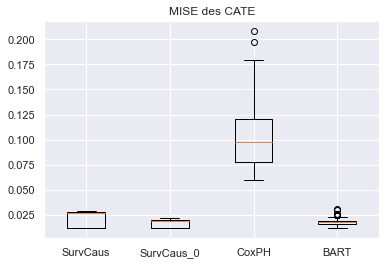

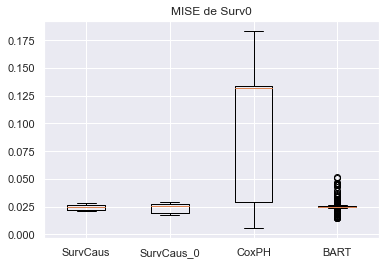

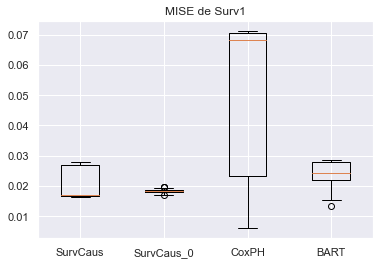

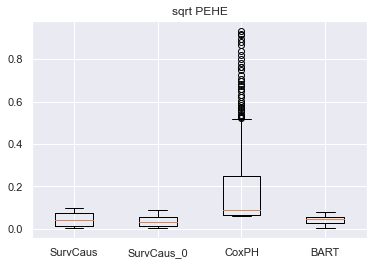

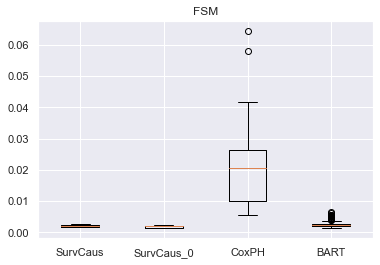

In [30]:
Ev.All_Results(list_models=list_models,
                        is_train=False,params_bart=p_bart_best)

# Benchmark

In [31]:

# Bilan of benchmark
Ev.bilan_benchmark


,models,Mise0,Mise1,CATE,PEHE,FSM
0,SurvCaus,"(0.024, 0.002)","(0.022, 0.005)","(0.02, 0.008)","(0.044, 0.029)","(0.002, 0.0)"
1,SurvCaus_0,"(0.023, 0.004)","(0.018, 0.0)","(0.016, 0.004)","(0.034, 0.021)","(0.002, 0.0)"
2,CoxPH,"(0.087, 0.053)","(0.049, 0.024)","(0.102, 0.029)","(0.185, 0.181)","(0.02, 0.01)"
3,BART,"(0.026, 0.007)","(0.024, 0.004)","(0.018, 0.003)","(0.041, 0.015)","(0.003, 0.001)"


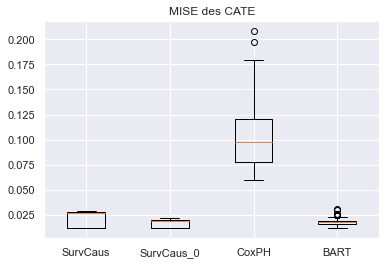

In [32]:
Ev.box_plot_cate
    


modifier S,
experiment
log - neptune
tables 
lancer :  wd, lin/nonlin, 
pas oublier brca !! 


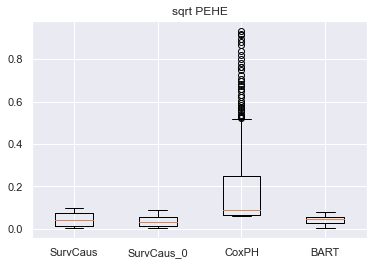

In [33]:
Ev.box_plot_pehe

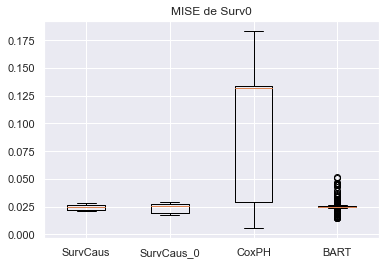

In [34]:
Ev.box_plot_surv0

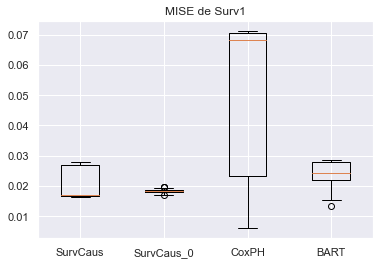

In [35]:
Ev.box_plot_surv1

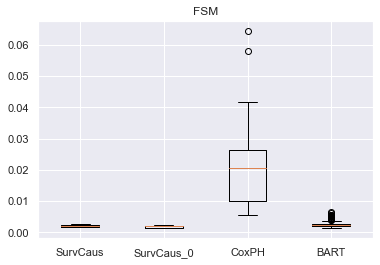

In [36]:
Ev.box_plot_FSM

(p_ours,p_bench) = (127, 107)
(p_ours,p_bench) = (127, 48)
(p_ours,p_bench) = (127, 195)


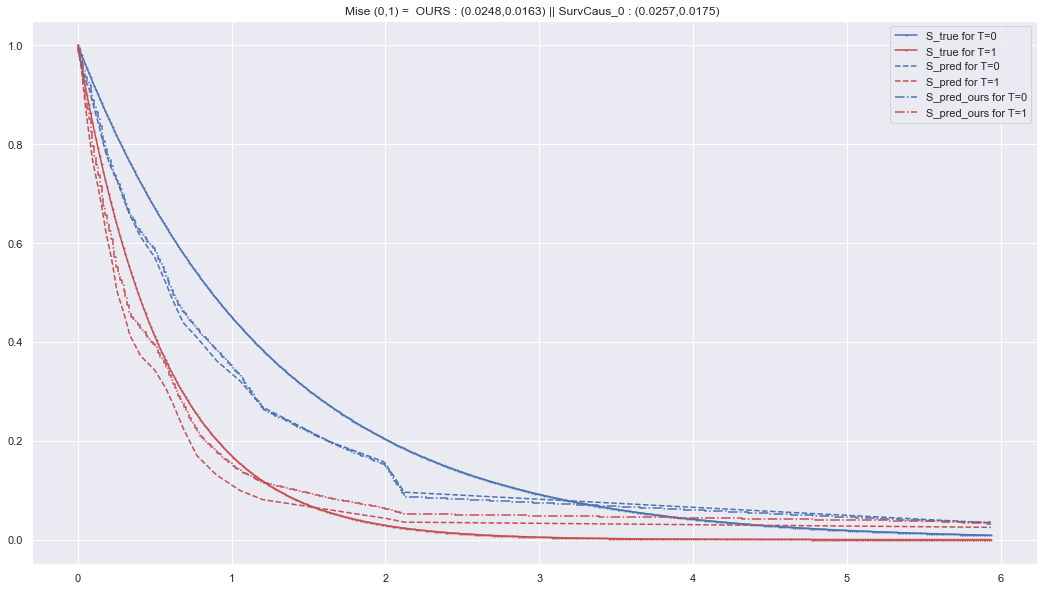

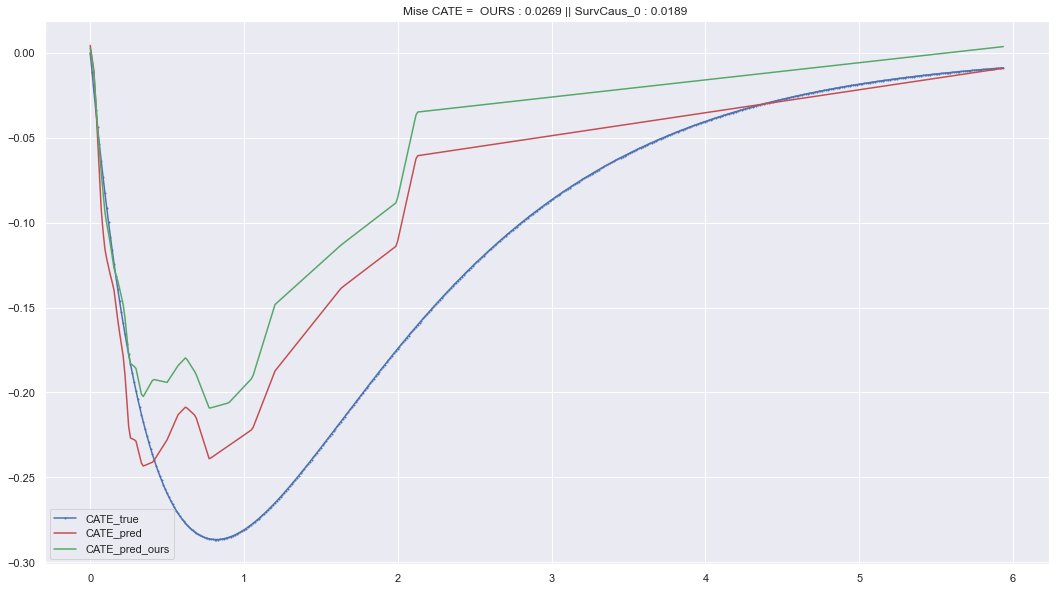

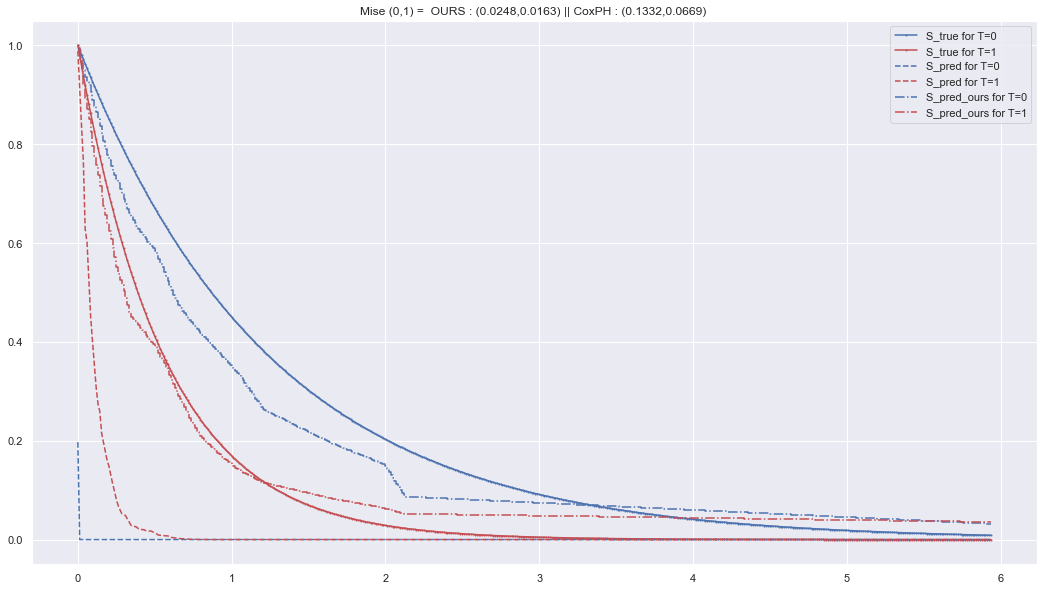

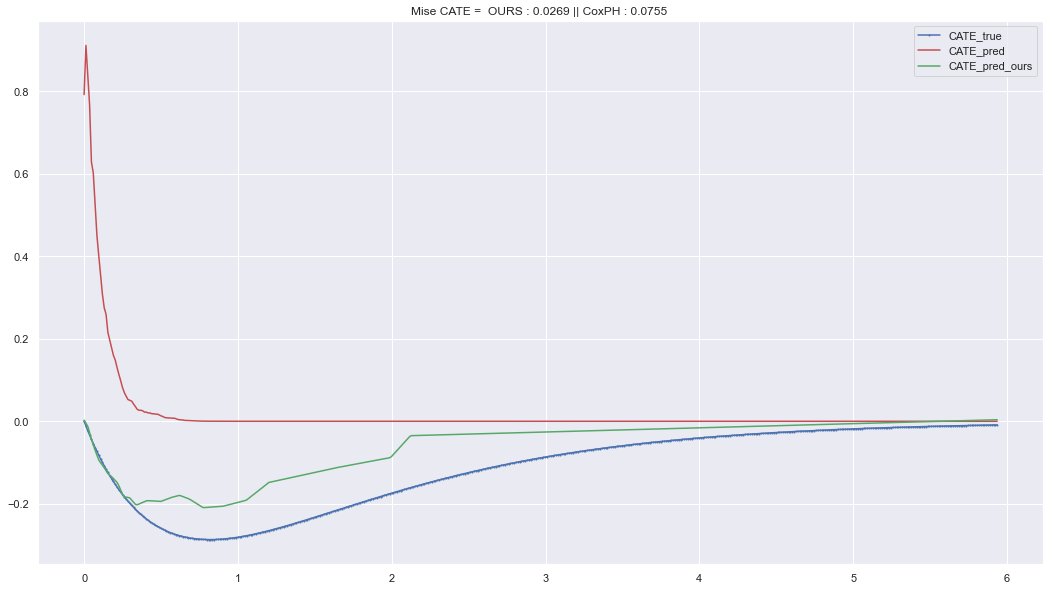

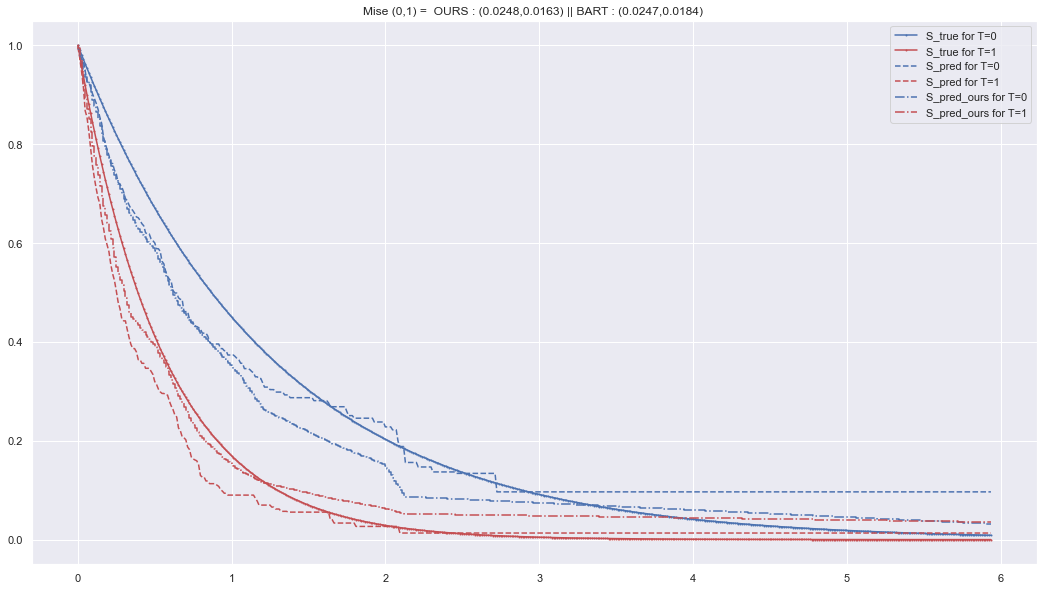

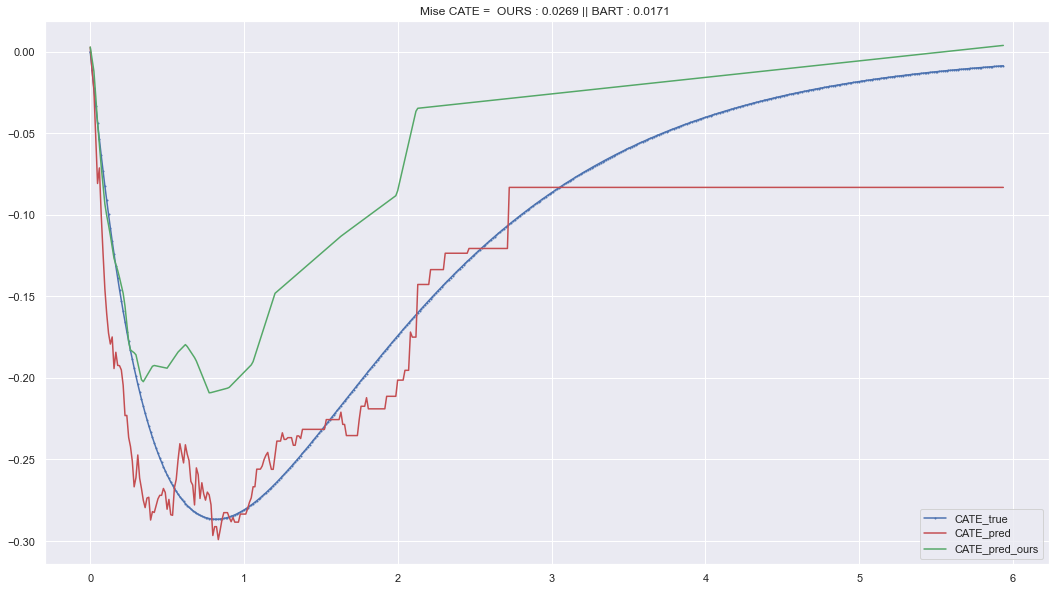

In [38]:

patient = 127
%matplotlib inline

for model_name in Ev.list_models[1:] :
    fig_surv,fig_cate = plots(patient, Ev.d_list_models, model_name)

